In [ ]:
# Download the dataset from the SharePoint link
!wget https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?download=1

# Rename the downloaded file to 'dataset.csv'
!mv EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?download=1 dataset.csv

--2024-08-24 14:44:35--  https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?download=1
Resolving aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/dataset_new.csv?ga=1 [following]
--2024-08-24 14:44:36--  https://aseblr-my.sharepoint.com/personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/dataset_new.csv?ga=1
Reusing existing connection to aseblr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 193716380 (185M) [application/octet-stream]
Saving to: ‘EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?downloa

In [ ]:
import pandas as pd

# Read the first 10,000 rows of the dataset.csv file into a pandas DataFrame
df = pd.read_csv("./dataset.csv", nrows=10000)

# Rename the columns 'text' and 'label' to 'text' and 'is_AI' respectively
df.rename(columns={
    "text": "text",
    "label": "is_AI"
}, inplace=True)

# Display the DataFrame
display(df)

,text,is_AI
0,The Face on Mars is nothing but a natural occu...,0
1,Students have a higher chance of catching a vi...,0
2,Driverless cars have good and bad things that ...,0
3,Some people might think that traveling in a gr...,1
4,How many of us students want to be forced to d...,0
...,...,...
9995,Venus is an extremely inhabitable environment ...,0
9996,First impressions are a crucial aspect of huma...,1
9997,"A few months ago, I had a simple, yet an impac...",0
9998,"""Try to work harder in life, that will help yo...",0


In [ ]:
# A1
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a TfidfVectorizer object with a maximum of 100 features and English stop words removed
vectorizer = TfidfVectorizer(max_features=100, stop_words="english")

# Fit the vectorizer to the 'text' column of the DataFrame and transform it into a TF-IDF matrix
features = vectorizer.fit_transform(df["text"]).toarray()

# Create a DataFrame from the TF-IDF matrix
feat_df = pd.DataFrame(features)
display(feat_df)

# Filter the DataFrame to include only rows where 'is_AI' is 1 (AI texts)
ai_feat = feat_df[df["is_AI"] == 1]
# Filter the DataFrame to include only rows where 'is_AI' is 0 (Human texts)
human_feat = feat_df[df["is_AI"] == 0]

# Calculate the mean of each feature for AI texts
ai_mean = ai_feat.mean(axis=0)
# Calculate the mean of each feature for Human texts
human_mean = human_feat.mean(axis=0)

# Print the mean of each feature for AI texts
print("AI text feature mean:", ai_mean.to_numpy())
print()
# Print the mean of each feature for Human texts
print("Human text feature mean:", human_mean.to_numpy())
print()

# Calculate the standard deviation of each feature for AI texts
ai_std = np.std(ai_feat, axis=0)
# Calculate the standard deviation of each feature for Human texts
human_std = np.std(human_feat, axis=0)

# Print the standard deviation of each feature for AI texts
print(f"AI text feature spread (S.D):", ai_std.to_numpy())
print()
# Print the standard deviation of each feature for Human texts
print(f"Human text feature spread (S.D):", human_std.to_numpy())
print()

# Calculate the Euclidean distance between the mean vectors of AI and Human texts
interclass_dist = np.linalg.norm(ai_mean - human_mean)
print(f"Distance between mean vectors between AI text and Human text feature vectors: {interclass_dist}")

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.077574,0.000000,0.000000,...,0.000000,0.089072,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.033843,0.000000,0.000000,0.000000,0.000000,0.033319,0.0,0.037848,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.031571,0.111871,0.061638,0.000000
2,0.042552,0.000000,0.000000,0.000000,0.000000,0.041893,0.0,0.000000,0.000000,0.250074,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.039695,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.324658,0.287605,0.000000,0.000000
4,0.043018,0.589163,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.040130,0.035550,0.039174,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.051405,0.000000,0.000000,0.000000,0.248411,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.88025,0.0,0.0,0.0,0.000000,0.042481,0.000000,0.052798
9996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.291822,0.000000,...,0.107611,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.331528,0.266361,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.092182,0.000000,0.000000,0.000000
9998,0.149435,0.000000,0.881024,0.000000,0.000000,0.000000,0.0,0.013927,0.033567,0.014637,...,0.012378,0.015991,0.00000,0.0,0.0,0.0,0.000000,0.041164,0.022681,0.140692


AI text feature mean: [0.03214157 0.03824235 0.01715088 0.01693476 0.00731299 0.05271594
 0.04034331 0.02880598 0.04356939 0.04732857 0.03065939 0.0099198
 0.02425214 0.0114878  0.02345965 0.05675696 0.02768211 0.04034642
 0.0218508  0.03642279 0.01477404 0.01678384 0.00780842 0.01355621
 0.00411167 0.01584578 0.05433428 0.00254238 0.0281295  0.05019383
 0.02836844 0.02352701 0.02049667 0.02753204 0.01283204 0.02654841
 0.02106164 0.02414175 0.06923864 0.01458718 0.01265871 0.01398015
 0.08235529 0.02839345 0.00423065 0.02806976 0.05641624 0.05204814
 0.05389453 0.05543507 0.06926155 0.03001411 0.01021762 0.059723
 0.028136   0.00973747 0.03032214 0.05279928 0.01875778 0.08621513
 0.03114418 0.0093457  0.01428984 0.0072772  0.02843609 0.05122681
 0.02064776 0.01063947 0.01098713 0.01815296 0.0116554  0.02188468
 0.01722664 0.01005757 0.06146127 0.05611252 0.01148672 0.03357464
 0.03413319 0.12829343 0.01019027 0.00957334 0.0205329  0.03502842
 0.01267855 0.02932078 0.03322619 0.0554082

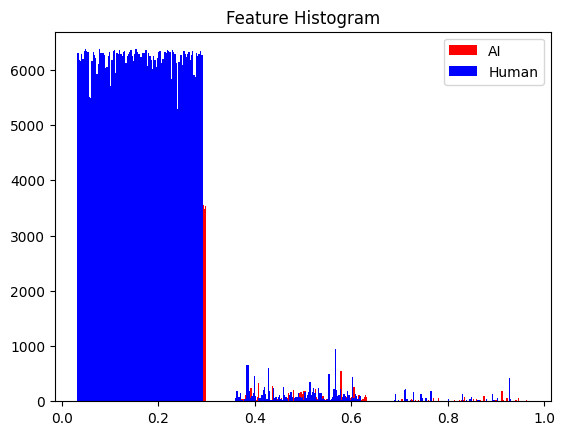

In [ ]:
# A2
import matplotlib.pyplot as plt

# Create a histogram for the features of AI texts with 3 bins and red color
plt.hist(ai_feat, bins=3, label="AI", color=["red"] * 100)
# Create a histogram for the features of Human texts with 3 bins and blue color
plt.hist(human_feat, bins=3, label="Human", color=["blue"] * 100)

# Add a legend to the plot
plt.legend()
# Set the title of the plot
plt.title("Feature Histogram")
# Display the plot
plt.show()

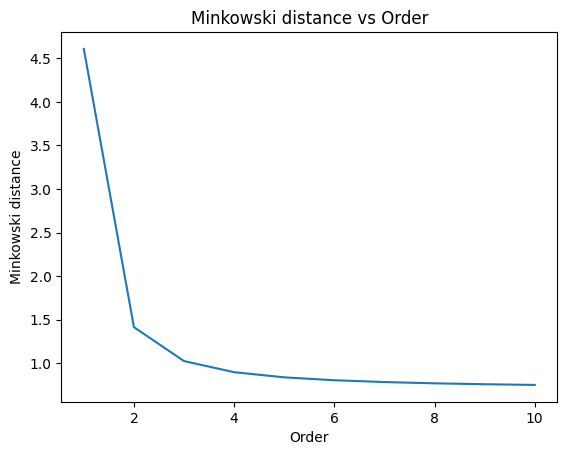

In [ ]:
# A3
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate Minkowski distance between two vectors
def minkowski_distance(x, y):
    # Define a range of orders from 1 to 10
    r = range(1, 11)
    # Initialize an empty list to store distances
    dist = []

    # Iterate through the range of orders
    for m in r:
        # Calculate the Minkowski distance between the two vectors with the current order
        dist.append(np.linalg.norm(x - y, ord=m))

    # Return the range of orders and the calculated distances
    return r, dist

# Calculate the Minkowski distance between the first AI text and the first Human text
r, dist = minkowski_distance(ai_feat.iloc[0], human_feat.iloc[0])

# Plot the Minkowski distance against the order
plt.plot(r, dist)
plt.title("Minkowski distance vs Order")
plt.xlabel("Order")
plt.ylabel("Minkowski distance")
plt.show()

print()

In [ ]:
# A4
from sklearn.model_selection import train_test_split

# Set the features (X) to the TF-IDF matrix
X = features
# Set the target variable (y) to the 'is_AI' column of the DataFrame
y = df["is_AI"]

# Split the data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

In [ ]:
# A5
from sklearn.neighbors import KNeighborsClassifier

# Set the number of neighbors (k) to 3
k = 3
# Create a KNeighborsClassifier model with k neighbors
model = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# A6
# Evaluate the model on the test data and print the accuracy score
print(f"Accuracy of KNN model with k={k}: {model.score(X_test, y_test)}")

0.8853333333333333

In [ ]:
# A7
# Make predictions on the test data
predictions = model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

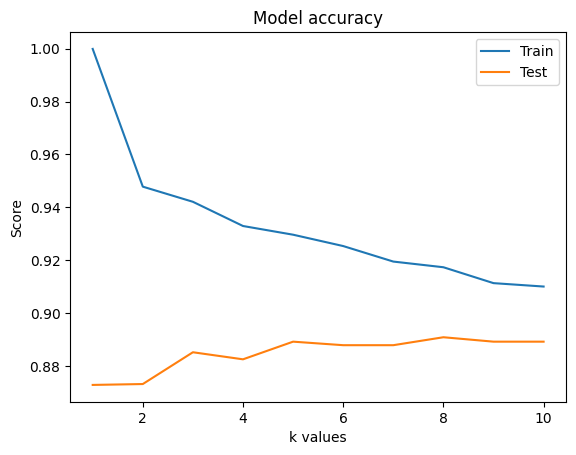

In [ ]:
# A8
import matplotlib.pyplot as plt

# Define a function to compare the performance of a KNeighborsClassifier model for different values of k
def compare_metrics(r, X, y, X_train, y_train, X_test, y_test):
  # Initialize lists to store training and testing scores
  train_scores = []
  test_scores = []

  # Iterate over a range of k values (from 1 to r-1)
  for i in range(1, r):
    # Set the current k value
    k = i
    # Create a KNeighborsClassifier model with the current k value
    m2 = KNeighborsClassifier(n_neighbors=k)
    # Train the model on the training data
    m2.fit(X_train, y_train)
    # Calculate and append the training score
    train_scores.append(m2.score(X_train, y_train))
    # Calculate and append the testing score
    test_scores.append(m2.score(X_test, y_test))

  # Return the lists of training and testing scores
  return train_scores, test_scores

# Set the maximum value for k
r = 11
# Call the compare_metrics function to get the scores for different k values
train_scores, test_scores = compare_metrics(r, X, y, X_train, y_train, X_test, y_test)

# Plot the training and testing scores against the k values
plt.plot(range(1, r), train_scores)
plt.plot(range(1, r), test_scores)

# Set the plot title, labels for x and y axes, and legend
plt.title("Model accuracy")
plt.xlabel("k values")
plt.ylabel("Score")
plt.legend(["Train", "Test"])
# Display the plot
plt.show()

In [ ]:
# A9
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, precision_score

# Predict the labels for the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the confusion matrix for the training data
c1 = confusion_matrix(y_train, y_pred_train)
# Calculate precision, recall, F1-score, and support for the training data
p1, r1, f1, s1 = precision_recall_fscore_support(y_train, y_pred_train, beta=1)

# Calculate the confusion matrix for the testing data
c2 = confusion_matrix(y_test, y_pred_test)
# Calculate precision, recall, F1-score, and support for the testing data
p2, r2, f2, s2 = precision_recall_fscore_support(y_test, y_pred_test, beta=1)

# Print the results for the training data
print("Training Data\n")
print("Confusion Matrix:", c1)
print("Precision:", p1[1])
print("Recall:", r1[1])
print("F1-Score:", f1[1])
print()

# Print the results for the testing data
print("Test Data\n")
print("Confusion Matrix:", c2)
print("Precision:", p2[1])
print("Recall:", r2[1])
print("F1-Score:", f2[1])
print()

Training Data

Confusion Matrix: [[4227  238]
 [ 167 2368]]
Precision: 0.908672294704528
Recall: 0.9341222879684418
F1-Score: 0.9212215522271932

Test Data

Confusion Matrix: [[1724  184]
 [ 160  932]]
Precision: 0.8351254480286738
Recall: 0.8534798534798534
F1-Score: 0.8442028985507245



In [ ]:
text = "The k-Nearest Neighbors (k-NN) algorithm is a simple yet powerful supervised machine learning technique used for classification and regression tasks. It works by identifying the 'k' closest data points (neighbors) to a given query point, based on a specified distance metric like Euclidean distance. For classification, k-NN assigns the most common class among these neighbors to the query point. In regression, it predicts the value as the average of the neighbors' values. Although computationally intensive with large datasets, k-NN is popular due to its ease of implementation and intuitive approach."
# Transform the input text into a vector representation using the vectorizer
transformed_text = vectorizer.transform([text])
# Use the trained model to predict the class of the transformed text
model.predict(transformed_text)

array([1])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create a RandomizedSearchCV object to search for the best hyperparameters
# The model is the KNeighborsClassifier model
# The parameter grid specifies the range of values for the 'n_neighbors' parameter
cv = RandomizedSearchCV(model, {
    "n_neighbors": range(1, 11)
})

# Fit the RandomizedSearchCV object to the training data
cv.fit(X_train, y_train)

# Access the best estimator found during the search
cv.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Applying the model on a real-world dataset for annotation
!wget https://tmpfiles.org/dl/11383790/dataset.xlsx

dataset = pd.read_excel("./dataset.xlsx")

--2024-08-16 19:38:17--  https://tmpfiles.org/dl/11383790/dataset.xlsx
Resolving tmpfiles.org (tmpfiles.org)... 172.67.195.247, 104.21.21.16, 2606:4700:3030::6815:1510, ...
Connecting to tmpfiles.org (tmpfiles.org)|172.67.195.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 621553 (607K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘dataset.xlsx’

dataset.xlsx        100%[===================>] 606.99K   744KB/s    in 0.8s    

2024-08-16 19:38:18 (744 KB/s) - ‘dataset.xlsx’ saved [621553/621553]



In [ ]:
display(dataset)

,text,text_length,average_word_length,unique_word_count,stop_word_count,special_character_count,keywords,sentiment,source,is_AI
0,Harsh on Les Ames to be included here. While h...,267,4.176,45,26,54,"first innings, first time, Les Ames",0,Reddit,NaN
1,DK Popa on there too? Tbh he&apos;s had some b...,65,3.333,14,9,15,"DK Popa, Tbh he&apos",0,Reddit,NaN
2,And got out for a golden duck in the first inn...,133,3.926,24,13,27,"first innings, first, test cricket",0,Reddit,NaN
3,Surprising how Prior was persisted by England ...,88,4.867,15,7,15,NaN,1,Reddit,NaN
4,Madande making Nsync proud,26,5.750,4,0,3,NaN,1,Reddit,NaN
...,...,...,...,...,...,...,...,...,...,...
4879,Review incoming?? On autofocus or the main cha...,51,5.125,8,3,10,NaN,0,Instagram,NaN
4880,The haters reigned after Thriller's unpreceden...,204,4.714,32,15,39,NaN,0,Instagram,NaN
4881,Ya está listo mi chocolate casero???,37,4.500,6,0,10,Ya está listo mi chocolate casero,0,Instagram,NaN
4882,I can’t wait! I love my Pixel ecosystem and lo...,89,4.438,15,8,18,Pixel ecosystem,1,Instagram,NaN


In [ ]:
labels = []

for text in dataset["text"]:
  if not pd.isnull(text):
    labels.append(model.predict(vectorizer.transform([text]))[0])
  else:
    labels.append(0)

dataset["is_AI"] = labels

dataset.to_excel("final.xlsx")